In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Flatten images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [5]:
# Define the autoencoder
input_dim = x_train.shape[1]
encoding_dim = 32  # Size of the encoded representation

In [6]:
# Input Layer
input_img = Input(shape=(input_dim,))

In [7]:
# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

In [8]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

In [9]:
# Autoencoder Model
autoencoder = Model(input_img, decoded)

In [10]:
# Encoder Model
encoder = Model(input_img, encoded)

In [11]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
# Train the autoencoder
history=autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3826 - val_loss: 0.1895
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1795 - val_loss: 0.1521
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1482 - val_loss: 0.1325
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1301 - val_loss: 0.1194
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1187 - val_loss: 0.1104
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1100 - val_loss: 0.1046
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1048 - val_loss: 0.1006
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1012 - val_loss: 0.0981
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0984 - val_loss: 0.0958
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0970 - val_loss: 0.0947
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0957 - val_loss: 0.0939
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [13]:
# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


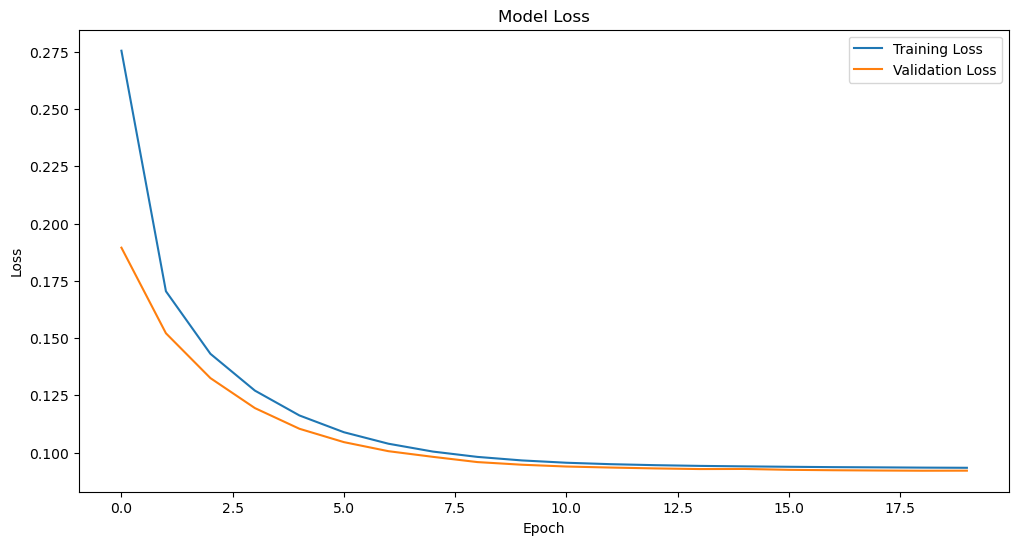

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


In [17]:
encoded_imgs = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step


In [18]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step


In [19]:
# Function to plot original and reconstructed images
def plot_reconstruction(x_test, decoded_imgs, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

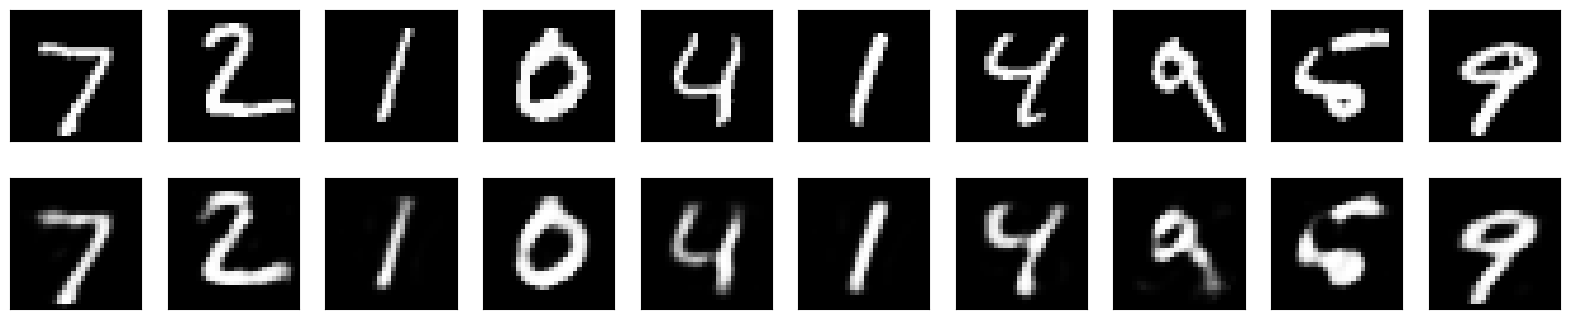

In [20]:
# Plot original vs. reconstructed images
plot_reconstruction(x_test, decoded_imgs)